# Statystyczne metody przetwarzania danych 

## Laboratorium 4 - algorytm normalizacja, selekcja cech.


### Opis
Celem laboratorium jest przeprowadzenie normalizacji i selekcji cech.

### Termin
Zadanie należy wykonać tego samego dnia. 

### System oceniania

| Liczba punktów (procentowo) | Ocena |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Punkty ujemne</u>

* `ocena - 0.5` jeżeli zadanie wysłano po laboratorium, ale < 7 dni; 
* `ocena - 1` jeżeli zadanie wysłano w terminie pomiędzy 7 a 14 dni;
* `ocena - 1.5` jeżeli zadanie wysłano po upływie 14 dni, ale przed ostatnim laboratorium;
* `ocena = 2` jeżeli zadanie wysłano po ostatnim laboratorium.

<u>Uwaga:</u>

Niedopuszczalne jest dzielenie się notatnikiem (plik `.ipynb`) z innymi studentami ani udostępnianie go w Internecie. Każdy student powinien pobrać notatnik samodzielnie z platformy WIKAMP.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały. Prace bardzo podobne albo grupowe będą uznawane za plagiat.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab04.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość). Warstwa prezentacji danych to jeden z głównych elementów wpływających na ocenę.**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```

### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:

### Normalizacja
* Wczytaj dane.
* Znormalizuj dane.
* Przeprowadź eksperyment z zastosowaniem algorytmu kNN lub NM dla danych znormalizowanych oraz bez normalizacji.
    * W eksperymencie wybierz minimum 5 klas oraz 10 cech.
* Przedstaw porównanie wyników klasyfikacji na danych znormalizowanych i bez normalizacji.
* Napisz wnioski.


### Wczytywanie danych

In [1]:
# Piotr Klimczak, 1SIiUM2, 239533 / 215275

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
    
columns_name = ['Class','Specimen Number','Eccentricity','Aspect Ratio','Elongation','Solidity',
                'Stochastic Convexity','Isoperimetric Factor','Maximal Indentation Depth','Lobedness',
                'Average Intensity','Average Contrast','Smoothness','Third moment','Uniformity','Entropy']

### Normalizowanie

In [2]:
# Normalizowaie - (x-xmin)/(xmax-xmin)
# axis=0 |, axis=1 _
# [wiersze, kolumny]

train_min = np.min(train, axis=0) #Szukanie minimum każdej kolumny
train_max = np.max(train, axis=0) #Szukanie maximum każdej kolumny
train_normalized = (train - train_min) / (train_max - train_min) #Normalizowanie danych treningowych
train_normalized[:,0] = train[:,0] #Podmienie znormalizowane numery klas na te, co byly

#Znormalizuje też dane testowe ALE WYKORZYSTUJĄC MIN I MAX Z DANYCH TRENINGOWYCH (bo tak trzeba)
test_normalized = (test - train_min) / (train_max - train_min) #Normalizowanie danych testowych
test_normalized[:,0] = test[:,0] #Podmienie znormalizowane numery klas na te, co byly; [wszystkie wiersze, kolumna 0]

### Algorytm NM (Euklides) + normalizacja

In [3]:
#5 wybranych klas:
klasy = [31, 5, 11, 25, 30] 
#klasy = [29, 5, 8, 4, 31]

#cech jest 10
#print(np.arange(6,16,1)) = [ 6  7  8  9 10 11 12 13 14 15]
wybrane_cechy = np.arange(5,15,1)

#Wybieranie klas
train_normalized_df = pd.DataFrame(train_normalized, columns = columns_name) #DataFrame 'pomocniczy'
train_class = train_normalized_df.loc[train_normalized_df['Class'].isin(klasy)] #by wybrać klasy
train_class = train_class.to_numpy() #z powrotem do numpy arraya

test_normalized_df = pd.DataFrame(test_normalized, columns = columns_name) #DataFrame 'pomocniczy'
test_class = test_normalized_df.loc[test_normalized_df['Class'].isin(klasy)] #by wybrać klasy
test_class = test_class.to_numpy() #z powrotem do numpy arraya

#Liczenie średniej
mean = np.empty((len(klasy), np.shape(train_class)[1]))  #ile-klas, ile-kolumn-w-klasie [5, 16], [wiersze, kolumny]
mean_wiersz = 0

for y in klasy: #tyle, ile jest klas
    mean[mean_wiersz,:] = np.mean(train_class[(train_class[:,0] == y), :], axis = 0)
    mean_wiersz += 1
    #do wiersza przypisz all kolumny z liczenia sredniej (po all kolumnach)
    #z train_class[wszystkie wiersze, gdzie klasa sie zgadza, all kolumny]
    #w pierwszej kolumnie musi wyjść numer klasy

#Liczenie odległości
sum_pow = 0 #init zmiennej do liczenia potęgi
odleglosc = np.empty((5,2)) #5 wierszy, 2 kolumny - wiersze = klasy; kolumna1 = sqrt(odleglosc); kolumna2 = która klasa
klasyfikacja = np.empty((np.shape(test_class)[0],12)) #tyle ile probek test. wierszy, 12 bo: klasa - 10 cechy - klasyfikacja

for probka_wiersz in range(np.shape(test_class)[0]): #tyle, ile jest próbek testowych
    
    for klasa in range(len(klasy)): #tyle, ile jest klas
        sum_pow = 0 #reset policzonej potęgi
        
        for kolumna in wybrane_cechy: #10 cech 
            #(sprawdzone na innych, typu 6:16 i one byly duzo gorsze)
            sum_pow += (test_class[probka_wiersz, kolumna] - mean[klasa, kolumna]) ** 2 #liczenie odległości 
        
        odleglosc[klasa,0] = np.sqrt(sum_pow) #do wiersza 0 / 1 / ...  i kolumny 0 przypisz odległość
        odleglosc[klasa,1] = mean[klasa,0] #do wiersza 0 / 1 / ... i kolumny 1 przypisz jaka to jest klasa (policzona z średniej defacto)
    
    wynik = np.argmin(odleglosc, axis = 0) #wynik = posortuj od najmniejszej do najwiekszej po kolumnach
    klasyfikacja[probka_wiersz, 11] = odleglosc[wynik[0], 1] #jako ostatnia kolumna chcemy info, do ktorej klasy przypisano próbkę

klasyfikacja[:, 0]  = test_class[:, 0] #chce klasy
klasyfikacja[:, 1:11] = test_class[:, 6:16] #chce cechy
#numpy tak naprawdę nie bierze od 1 do 11, tylko od 1 do 10
columns_name_nm = ['Class',
                   'Stochastic Convexity','Isoperimetric Factor','Maximal Indentation Depth','Lobedness',
                   'Average Intensity','Average Contrast','Smoothness','Third moment','Uniformity','Entropy',
                   'Klasyfikacja probki']
wynik_klasyfikacji = pd.DataFrame(klasyfikacja, columns = columns_name_nm)
wynik_klasyfikacji

,Class,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Klasyfikacja probki
0,31.0,0.822817,0.204748,0.114205,0.021510,0.091549,0.216215,0.091114,0.094380,0.030993,0.163356,5.0
1,31.0,0.810909,0.180505,0.414745,0.177331,0.071034,0.163708,0.065579,0.063462,0.033540,0.137765,31.0
2,30.0,0.834726,0.536158,0.131375,0.025423,0.550790,0.553685,0.378656,0.246772,0.421772,0.886722,30.0
3,31.0,0.767267,0.182020,0.255600,0.071749,0.077102,0.188813,0.077119,0.079629,0.030980,0.134598,5.0
4,11.0,0.457750,0.157810,0.703015,0.500822,0.151979,0.266302,0.120445,0.102468,0.085557,0.312219,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
270,5.0,0.741376,0.340158,0.249261,0.059936,0.183214,0.428716,0.162708,0.188195,0.085387,0.329034,5.0
271,5.0,0.770239,0.386188,0.213592,0.050839,0.229129,0.385119,0.208638,0.188408,0.084388,0.413497,5.0
272,11.0,0.533699,0.220300,0.655226,0.438121,0.121004,0.264629,0.105414,0.111274,0.030885,0.246515,11.0
273,25.0,0.952172,0.777933,0.240784,0.057727,0.663956,0.822874,0.780706,0.990042,0.216042,0.608515,25.0


In [4]:
def Matrix():
    y_true = wynik_klasyfikacji['Class']
    y_pred = wynik_klasyfikacji['Klasyfikacja probki']
    
    unique = np.unique([y_pred.to_numpy()]) #w ktorymkolwiek, bo przeciez sa te same klasy tu i tu
    
    conmat = pd.DataFrame(
        confusion_matrix(y_true, y_pred, labels=unique),
        index = ['True: {:}'.format(x) for x in unique],
        columns = ['Pred: {:}'.format(x) for x in unique]
    )
    
    print(conmat)
    
def Dokladnosc():
    zgodne = 0 #init & czysc zmienna

    for i in range(len(wynik_klasyfikacji)):
        if ((wynik_klasyfikacji['Class'])[i]  == (wynik_klasyfikacji['Klasyfikacja probki'])[i]): #czy pokrywa się klasyfikacja
            zgodne += 1 #jeżeli tak, +1
        
    acc = zgodne / len(wynik_klasyfikacji)
    print("\n")
    print("Dokładność: ", acc*100,'%')

In [5]:
Matrix()
Dokladnosc()

            Pred: 5.0  Pred: 11.0  Pred: 25.0  Pred: 30.0  Pred: 31.0
True: 5.0          55           0           0           0           0
True: 11.0          0          84           0           0           4
True: 25.0          0           0          22          11           0
True: 30.0          2           0           0          53           0
True: 31.0         32           0           0           0          12


Dokładność:  82.18181818181817 %


### Algorytm NM (Euklides) + brak normalizacji

In [6]:
#Wybieranie klas
train_df = pd.DataFrame(train, columns = columns_name) #DataFrame 'pomocniczy'
train_class = train_df.loc[train_df['Class'].isin(klasy)] #by wybrać klasy
train_class = train_class.to_numpy() #z powrotem do numpy arraya

test_df = pd.DataFrame(test, columns = columns_name) #DataFrame 'pomocniczy'
test_class = test_df.loc[test_df['Class'].isin(klasy)] #by wybrać klasy
test_class = test_class.to_numpy() #z powrotem do numpy arraya

#Liczenie średniej
mean = np.empty((len(klasy), np.shape(train_class)[1]))  #ile-klas, ile-kolumn-w-klasie [5, 16], [wiersze, kolumny]
mean_wiersz = 0

for y in klasy: #tyle, ile jest klas
    mean[mean_wiersz,:] = np.mean(train_class[(train_class[:,0] == y), :], axis = 0)
    mean_wiersz += 1
    #do wiersza przypisz all kolumny z liczenia sredniej (po all kolumnach)
    #z train_class[wszystkie wiersze, gdzie klasa sie zgadza, all kolumny]
    #w pierwszej kolumnie musi wyjść numer klasy

#Liczenie odległości
sum_pow = 0 #init zmiennej do liczenia potęgi
odleglosc = np.empty((5,2)) #5 wierszy, 2 kolumny - wiersze = klasy; kolumna1 = sqrt(odleglosc); kolumna2 = która klasa
klasyfikacja = np.empty((np.shape(test_class)[0],12)) #tyle ile probek test. wierszy, 12 bo: klasa - 10 cechy - klasyfikacja

for probka_wiersz in range(np.shape(test_class)[0]): #tyle, ile jest próbek testowych
    
    for klasa in range(len(klasy)): #tyle, ile jest klas
        sum_pow = 0 #reset policzonej potęgi

        for kolumna in wybrane_cechy: #10 cech (ostatnie 10 kolumn)
            sum_pow += (test_class[probka_wiersz, kolumna] - mean[klasa, kolumna]) ** 2 #liczenie odległości 
        
        odleglosc[klasa,0] = np.sqrt(sum_pow) #do wiersza 0 / 1 / ...  i kolumny 0 przypisz odległość
        odleglosc[klasa,1] = mean[klasa,0] #do wiersza 0 / 1 / ... i kolumny 1 przypisz jaka to jest klasa (policzona z średniej defacto)
    
    wynik = np.argmin(odleglosc, axis = 0) #wynik = posortuj od najmniejszej do najwiekszej po kolumnach
    klasyfikacja[probka_wiersz, 11] = odleglosc[wynik[0], 1] #jako ostatnia kolumna chcemy info, do ktorej klasy przypisano próbkę

klasyfikacja[:, 0]  = test_class[:, 0] #chce klasy
klasyfikacja[:, 1:11] = test_class[:, 6:16] #chce cechy
#numpy tak naprawdę nie bierze od 1 do 11, tylko od 1 do 10
columns_name_nm = ['Class',
                   'Stochastic Convexity','Isoperimetric Factor','Maximal Indentation Depth','Lobedness',
                   'Average Intensity','Average Contrast','Smoothness','Third moment','Uniformity','Entropy',
                   'Klasyfikacja probki']
wynik_klasyfikacji = pd.DataFrame(klasyfikacja, columns = columns_name_nm)
wynik_klasyfikacji

,Class,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Klasyfikacja probki
0,31.0,0.984210,0.196380,0.020897,0.079479,0.016599,0.075247,0.005630,0.001901,0.000044,0.489920,30.0
1,31.0,0.973680,0.174290,0.082108,1.227000,0.012512,0.060688,0.003670,0.001074,0.000052,0.419280,5.0
2,30.0,0.994740,0.498360,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.486600,30.0
3,31.0,0.935090,0.175670,0.049695,0.449460,0.013721,0.067649,0.004556,0.001506,0.000044,0.410540,5.0
4,11.0,0.661400,0.153610,0.140820,3.609300,0.028638,0.089135,0.007882,0.002118,0.000210,0.900820,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
270,5.0,0.912196,0.319765,0.048404,0.362463,0.034861,0.134169,0.011128,0.004413,0.000210,0.947233,5.0
271,5.0,0.937718,0.361707,0.041139,0.295472,0.044008,0.122080,0.014654,0.004418,0.000207,1.180374,5.0
272,11.0,0.728558,0.210551,0.131087,3.147546,0.022467,0.088671,0.006728,0.002353,0.000044,0.719461,11.0
273,25.0,1.098591,0.718665,0.046677,0.346197,0.130635,0.243460,0.058580,0.025878,0.000607,1.718675,25.0


In [7]:
Matrix()
Dokladnosc()

            Pred: 5.0  Pred: 11.0  Pred: 25.0  Pred: 30.0  Pred: 31.0
True: 5.0          51           0           0           4           0
True: 11.0          0          66           0           0          22
True: 25.0          0           0          33           0           0
True: 30.0          0           0           0          55           0
True: 31.0         33           0           0          11           0


Dokładność:  74.54545454545455 %


### Normalizacja - wnioski
Przeprowadzono poprawną normalizację danych - z zbioru treningowego wyznaczono min i max wartość, następnie policzono (x-xmin)/(xmax-xmin).

To samo zrobiono dla zbioru testowego, wykorzystując min i max z zbioru treningowego.

Wybrałem pierwsze 10 cech z podanego datasetu.

[ReadMe.pdf]: shape (attributes 3 to 9) and texture (attributes 10 to 16) - uznałem, że shape jest ważniejsze

Wyniki:
- dla klas [31, 5, 11, 25, 30] osiągnięto **82.18% po** oraz **74.55% przed** normalizacją

Jak widać, normalizacja podniosła poziom dopasowania próbek testowych.

### Selekcja cech
* Przeprowadź selekcję cech za pomocą metod poznanych na wykładzie (np. z zastosowaniem współczynnika Fishera)
    * Wybierz 2-5 cech (ze zbioru 10 cech wybranych w poprzednim eksperymencie) i opisz dlaczego je wybrałeś.
* Przeprowadź klasyfikację na wybranych cechach.
* Porównaj wyniki klasyfikacji:
    * dla 10 cech bez normalizacji,
    * dla 10 cech z normalizacją,
    * dla 2-5 cech bez normalizacji,
    * dla 2-5 cech z normalizacją.
* Opisz wyniki i napisz wnioski.


### Fisher

In [8]:
#Wybieranie klas i obliczanie macierzy kowariancji
train_df = pd.DataFrame(train_normalized, columns = columns_name) #DataFrame 'pomocniczy'
train_class = train_df.loc[train_df['Class'].isin(klasy)] #by wybrać klasy, do średniej
train_class = train_class.to_numpy() #z powrotem do numpy arraya
train_cov = list() #lista do której będziemy dodawać wyniki

for x in range(len(klasy)): #tyle, ile jest klas
    train_class_pojedyncza = train_df.loc[train_df['Class'].isin([klasy[x]])] #by wybrać klasę konkretną
    train_class_pojedyncza_numpy = train_class_pojedyncza.to_numpy() #z powrotem do numpy arraya
    train_cov.append(np.cov(train_class_pojedyncza_numpy[:, wybrane_cechy].T)) #<- WYBIERANIE CECH
    #m. kowariancji liczona pośród 10 cech (od 6 do 15 kolumny), transponowane by pasował rozmiar
    
#Liczenie średniej
mean = np.empty((len(klasy), np.shape(train_class)[1]))  #[5, 16], [wiersze ile klas, kolumny 16]
mean_wiersz = 0

for y in klasy: #tyle, ile jest klas
    mean[mean_wiersz,:] = np.mean(train_class[(train_class[:,0] == y), :], axis = 0)
    mean_wiersz += 1
    
#Liczenie Fishera
fisher = np.empty((10,2)) #10 wierszy, 2 kolumny - 10 cech, 1 wartość policzona, 2 jaka cecha byla
fisher_all = list()

#[klasa,klasanext] = [01,02,03,04 | 12,13,14 | 23,24 | 34] = 10 razy, 10 roznych polaczen miedzy klasami
for klasa in range(len(klasy)): #tyle, ile jest klas

    for klasanext in range(klasa + 1, len(klasy)): #tyle, ile jest klas, ale +1;
    #nawet jak klasa = 4, to ten for sie po prostu nie wykona
           
        for cecha in range(10): #tyle, ile jest cech (10)
            fisher[cecha,0] = abs(mean[klasa, cecha+1] - mean[klasanext, cecha+1]) / (np.sqrt(train_cov[klasa][cecha,cecha]) + np.sqrt(train_cov[klasanext][cecha,cecha]))
            #mean[wiersze-5klas, 16kolumn]; 
            #abs(mean[klasa0,cecha+1]) - mean[klasa1,cecha+1], potem weź ślad dlatego [cecha,cecha] - idzie po glownej przekatnej
            #cecha+1 żeby ominąć kolumnę 0 z klasami
            fisher[cecha,1] = cecha+1 #jaka cecha?
                
        fisher_all.append(fisher[fisher[:,0].argsort()[::-1]]) #posortowanego fishera przypisz do ogolnej listy
        #fisher[ fisher[wszystkie-wiersze,kolumna0-policzonecechy].argsort() ]
        #[::-1] - start:stop:step - wszystkie:wszystkie:od konca, bo -1 to ostatni element w arrayu ogolnie, jak by wywolywac
            
result = [l[:3] for l in fisher_all] #weź po kolei każdą tabelę z fisher_all i pokaż 3 pierwsze

unique, count = np.unique(result, return_counts=True) #pokaz unikatowe wartosci oraz ile razy sie pojawily

print("unique, count")
print(sorted(set(zip(unique,count)), key = lambda x: x[1], reverse=True)[:7])
#lacze zipem unique i count, setem ustawiam (by dalo sie to 'pokazac'), sortuje po kolumnie 1, odwracam, pobieram pierwsze :7

unique, count
[(10.0, 7), (5.0, 5), (3.0, 4), (4.0, 3), (8.0, 3), (6.0, 3), (2.0, 2)]


### Algorytm NM (Euklides) + normalizacja + 3 wybrane cechy

In [9]:
#columns_name = ['Class','Specimen Number','Eccentricity','Aspect Ratio','Elongation','Solidity',
#                'Stochastic Convexity','Isoperimetric Factor','Maximal Indentation Depth','Lobedness',
#                'Average Intensity','Average Contrast','Smoothness','Third moment','Uniformity','Entropy']

#wybrane cechy z powyzej, narazie top3
wybrane_cechy = [10,5,3] 

#Wybieranie klas
train_normalized_df = pd.DataFrame(train_normalized, columns = columns_name) #DataFrame 'pomocniczy'
train_class = train_normalized_df.loc[train_normalized_df['Class'].isin(klasy)] #by wybrać klasy
train_class = train_class.to_numpy() #z powrotem do numpy arraya

test_normalized_df = pd.DataFrame(test_normalized, columns = columns_name) #DataFrame 'pomocniczy'
test_class = test_normalized_df.loc[test_normalized_df['Class'].isin(klasy)] #by wybrać klasy
test_class = test_class.to_numpy() #z powrotem do numpy arraya

#Liczenie średniej
mean = np.empty((len(klasy), np.shape(train_class)[1]))  #ile-klas, ile-kolumn-w-klasie [5, 16], [wiersze, kolumny]
mean_wiersz = 0

for y in klasy: #tyle, ile jest klas
    mean[mean_wiersz,:] = np.mean(train_class[(train_class[:,0] == y), :], axis = 0)
    mean_wiersz += 1
    #do wiersza przypisz all kolumny z liczenia sredniej (po all kolumnach)
    #z train_class[wszystkie wiersze, gdzie klasa sie zgadza, all kolumny]
    #w pierwszej kolumnie musi wyjść numer klasy

#Liczenie odległości
sum_pow = 0 #init zmiennej do liczenia potęgi
odleglosc = np.empty((5,2)) #5 wierszy, 2 kolumny - wiersze = klasy; kolumna1 = sqrt(odleglosc); kolumna2 = która klasa
klasyfikacja = np.empty((np.shape(test_class)[0],5)) #tyle ile probek test. wierszy, 5 bo: klasa - 3 cechy - klasyfikacja

for probka_wiersz in range(np.shape(test_class)[0]): #tyle, ile jest próbek testowych
    
    for klasa in range(len(klasy)): #tyle, ile jest klas
        sum_pow = 0 #reset policzonej potęgi
        
        for kolumna in wybrane_cechy: #3 cechy
            sum_pow += (test_class[probka_wiersz, kolumna] - mean[klasa, kolumna]) ** 2 #liczenie odległości 
        
        odleglosc[klasa,0] = np.sqrt(sum_pow) #do wiersza 0 / 1 / ...  i kolumny 0 przypisz odległość
        odleglosc[klasa,1] = mean[klasa,0] #do wiersza 0 / 1 / ... i kolumny 1 przypisz jaka to jest klasa (policzona z średniej defacto)
    
    wynik = np.argmin(odleglosc, axis = 0) #wynik = posortuj od najmniejszej do najwiekszej po kolumnach
    klasyfikacja[probka_wiersz, 4] = odleglosc[wynik[0], 1] #jako ostatnia kolumna chcemy info, do ktorej klasy przypisano próbkę

klasyfikacja[:, 0]  = test_class[:, 0] #chce klasy
klasyfikacja[:, 1:4] = test_class[:, wybrane_cechy] #chce cechy
#numpy tak naprawdę nie bierze od 1 do 11, tylko od 1 do 10
columns_name_nm = ['Class',
                   'Lobedness','Elongation','Eccentricity',
                   'Klasyfikacja probki']
wynik_klasyfikacji = pd.DataFrame(klasyfikacja, columns = columns_name_nm)
wynik_klasyfikacji

,Class,Lobedness,Elongation,Eccentricity,Klasyfikacja probki
0,31.0,0.091549,0.744569,0.489485,31.0
1,31.0,0.071034,0.631097,0.476341,31.0
2,30.0,0.550790,0.748358,0.025252,25.0
3,31.0,0.077102,0.675440,0.487136,31.0
4,11.0,0.151979,0.168926,0.023431,11.0
...,...,...,...,...,...
270,5.0,0.183214,0.706166,0.082252,5.0
271,5.0,0.229129,0.690647,0.060216,5.0
272,11.0,0.121004,0.315646,0.034811,11.0
273,25.0,0.663956,0.887008,0.064020,25.0


In [10]:
Matrix()
Dokladnosc()

            Pred: 5.0  Pred: 11.0  Pred: 25.0  Pred: 30.0  Pred: 31.0
True: 5.0          50           0           0           5           0
True: 11.0          0          88           0           0           0
True: 25.0          0           0          32           1           0
True: 30.0         10           0          28          17           0
True: 31.0          0           0           0           0          44


Dokładność:  84.0 %


### Algorytm NM (Euklides) + brak normalizacji + 3 wybrane cechy

In [11]:
#Wybieranie klas
train_df = pd.DataFrame(train, columns = columns_name) #DataFrame 'pomocniczy'
train_class = train_df.loc[train_df['Class'].isin(klasy)] #by wybrać klasy
train_class = train_class.to_numpy() #z powrotem do numpy arraya

test_df = pd.DataFrame(test, columns = columns_name) #DataFrame 'pomocniczy'
test_class = test_df.loc[test_df['Class'].isin(klasy)] #by wybrać klasy
test_class = test_class.to_numpy() #z powrotem do numpy arraya

#Liczenie średniej
mean = np.empty((len(klasy), np.shape(train_class)[1]))  #ile-klas, ile-kolumn-w-klasie [5, 16], [wiersze, kolumny]
mean_wiersz = 0

for y in klasy: #tyle, ile jest klas
    mean[mean_wiersz,:] = np.mean(train_class[(train_class[:,0] == y), :], axis = 0)
    mean_wiersz += 1
    #do wiersza przypisz all kolumny z liczenia sredniej (po all kolumnach)
    #z train_class[wszystkie wiersze, gdzie klasa sie zgadza, all kolumny]
    #w pierwszej kolumnie musi wyjść numer klasy

#Liczenie odległości
sum_pow = 0 #init zmiennej do liczenia potęgi
odleglosc = np.empty((5,2)) #5 wierszy, 2 kolumny - wiersze = klasy; kolumna1 = sqrt(odleglosc); kolumna2 = która klasa
klasyfikacja = np.empty((np.shape(test_class)[0],5)) #tyle ile probek test. wierszy, 5 bo: klasa - 3 cechy - klasyfikacja

for probka_wiersz in range(np.shape(test_class)[0]): #tyle, ile jest próbek testowych
    
    for klasa in range(len(klasy)): #tyle, ile jest klas
        sum_pow = 0 #reset policzonej potęgi
        
        for kolumna in wybrane_cechy: #3 cechy
            sum_pow += (test_class[probka_wiersz, kolumna] - mean[klasa, kolumna]) ** 2 #liczenie odległości 
        
        odleglosc[klasa,0] = np.sqrt(sum_pow) #do wiersza 0 / 1 / ...  i kolumny 0 przypisz odległość
        odleglosc[klasa,1] = mean[klasa,0] #do wiersza 0 / 1 / ... i kolumny 1 przypisz jaka to jest klasa (policzona z średniej defacto)
    
    wynik = np.argmin(odleglosc, axis = 0) #wynik = posortuj od najmniejszej do najwiekszej po kolumnach
    klasyfikacja[probka_wiersz, 4] = odleglosc[wynik[0], 1] #jako ostatnia kolumna chcemy info, do ktorej klasy przypisano próbkę

klasyfikacja[:, 0]  = test_class[:, 0] #chce klasy
klasyfikacja[:, 1:4] = test_class[:, wybrane_cechy] #chce cechy
#numpy tak naprawdę nie bierze od 1 do 11, tylko od 1 do 10
columns_name_nm = ['Class',
                   'Lobedness','Elongation','Eccentricity',
                   'Klasyfikacja probki']
wynik_klasyfikacji = pd.DataFrame(klasyfikacja, columns = columns_name_nm)
wynik_klasyfikacji

,Class,Lobedness,Elongation,Eccentricity,Klasyfikacja probki
0,31.0,0.016599,0.933460,9.735100,31.0
1,31.0,0.012512,0.849910,9.491200,31.0
2,30.0,0.108090,0.936250,1.120800,30.0
3,31.0,0.013721,0.882560,9.691500,31.0
4,11.0,0.028638,0.509610,1.087000,11.0
...,...,...,...,...,...
270,5.0,0.034861,0.905184,2.178478,5.0
271,5.0,0.044008,0.893757,1.769592,5.0
272,11.0,0.022467,0.617641,1.298175,11.0
273,25.0,0.130635,1.038339,1.840179,5.0


In [12]:
Matrix()
Dokladnosc()

            Pred: 5.0  Pred: 11.0  Pred: 25.0  Pred: 30.0  Pred: 31.0
True: 5.0          40           0          14           1           0
True: 11.0          0          85           3           0           0
True: 25.0          8           0          24           1           0
True: 30.0          0           0          14          41           0
True: 31.0          0           0           0           0          44


Dokładność:  85.0909090909091 %


### Algorytm NM (Euklides) + normalizacja + 5 wybranych cech

In [13]:
#columns_name = ['Class','Specimen Number','Eccentricity','Aspect Ratio','Elongation','Solidity',
#                'Stochastic Convexity','Isoperimetric Factor','Maximal Indentation Depth','Lobedness',
#                'Average Intensity','Average Contrast','Smoothness','Third moment','Uniformity','Entropy']

#wybrane cechy z powyzej, narazie top3
wybrane_cechy = [10,5,3,4,8] #Aspect Ratio, S

#Wybieranie klas
train_normalized_df = pd.DataFrame(train_normalized, columns = columns_name) #DataFrame 'pomocniczy'
train_class = train_normalized_df.loc[train_normalized_df['Class'].isin(klasy)] #by wybrać klasy
train_class = train_class.to_numpy() #z powrotem do numpy arraya

test_normalized_df = pd.DataFrame(test_normalized, columns = columns_name) #DataFrame 'pomocniczy'
test_class = test_normalized_df.loc[test_normalized_df['Class'].isin(klasy)] #by wybrać klasy
test_class = test_class.to_numpy() #z powrotem do numpy arraya

#Liczenie średniej
mean = np.empty((len(klasy), np.shape(train_class)[1]))  #ile-klas, ile-kolumn-w-klasie [5, 16], [wiersze, kolumny]
mean_wiersz = 0

for y in klasy: #tyle, ile jest klas
    mean[mean_wiersz,:] = np.mean(train_class[(train_class[:,0] == y), :], axis = 0)
    mean_wiersz += 1
    #do wiersza przypisz all kolumny z liczenia sredniej (po all kolumnach)
    #z train_class[wszystkie wiersze, gdzie klasa sie zgadza, all kolumny]
    #w pierwszej kolumnie musi wyjść numer klasy

#Liczenie odległości
sum_pow = 0 #init zmiennej do liczenia potęgi
odleglosc = np.empty((5,2)) #5 wierszy, 2 kolumny - wiersze = klasy; kolumna1 = sqrt(odleglosc); kolumna2 = która klasa
klasyfikacja = np.empty((np.shape(test_class)[0],7)) #tyle ile probek test. wierszy, 5 bo: klasa - 5 cech - klasyfikacja

for probka_wiersz in range(np.shape(test_class)[0]): #tyle, ile jest próbek testowych
    
    for klasa in range(len(klasy)): #tyle, ile jest klas
        sum_pow = 0 #reset policzonej potęgi
        
        for kolumna in wybrane_cechy: #3 cechy
            sum_pow += (test_class[probka_wiersz, kolumna] - mean[klasa, kolumna]) ** 2 #liczenie odległości 
        
        odleglosc[klasa,0] = np.sqrt(sum_pow) #do wiersza 0 / 1 / ...  i kolumny 0 przypisz odległość
        odleglosc[klasa,1] = mean[klasa,0] #do wiersza 0 / 1 / ... i kolumny 1 przypisz jaka to jest klasa (policzona z średniej defacto)
    
    wynik = np.argmin(odleglosc, axis = 0) #wynik = posortuj od najmniejszej do najwiekszej po kolumnach
    klasyfikacja[probka_wiersz, 6] = odleglosc[wynik[0], 1] #jako ostatnia kolumna chcemy info, do ktorej klasy przypisano próbkę

klasyfikacja[:, 0]  = test_class[:, 0] #chce klasy
klasyfikacja[:, 1:6] = test_class[:, wybrane_cechy] #chce cechy
#numpy tak naprawdę nie bierze od 1 do 11, tylko od 1 do 10
columns_name_nm = ['Class',
                   'Lobedness','Elongation','Eccentricity','Aspect Ratio','Isoperimetric Factor',
                   'Klasyfikacja probki']
wynik_klasyfikacji = pd.DataFrame(klasyfikacja, columns = columns_name_nm)
wynik_klasyfikacji

,Class,Lobedness,Elongation,Eccentricity,Aspect Ratio,Isoperimetric Factor,Klasyfikacja probki
0,31.0,0.091549,0.744569,0.489485,0.878487,0.114205,5.0
1,31.0,0.071034,0.631097,0.476341,0.888243,0.414745,31.0
2,30.0,0.550790,0.748358,0.025252,0.233860,0.131375,30.0
3,31.0,0.077102,0.675440,0.487136,0.886564,0.255600,31.0
4,11.0,0.151979,0.168926,0.023431,0.650511,0.703015,11.0
...,...,...,...,...,...,...,...
270,5.0,0.183214,0.706166,0.082252,0.539703,0.249261,5.0
271,5.0,0.229129,0.690647,0.060216,0.542140,0.213592,5.0
272,11.0,0.121004,0.315646,0.034811,0.643095,0.655226,11.0
273,25.0,0.663956,0.887008,0.064020,0.355481,0.240784,25.0


In [14]:
Matrix()
Dokladnosc()

            Pred: 5.0  Pred: 11.0  Pred: 25.0  Pred: 30.0  Pred: 31.0
True: 5.0          54           0           1           0           0
True: 11.0          0          88           0           0           0
True: 25.0          0           0          33           0           0
True: 30.0          0           0          15          40           0
True: 31.0          8           0           0           0          36


Dokładność:  91.27272727272727 %


### Algorytm NM (Euklides) + brak normalizacji + 3 wybrane cechy

In [15]:
#Wybieranie klas
train_df = pd.DataFrame(train, columns = columns_name) #DataFrame 'pomocniczy'
train_class = train_df.loc[train_df['Class'].isin(klasy)] #by wybrać klasy
train_class = train_class.to_numpy() #z powrotem do numpy arraya

test_df = pd.DataFrame(test, columns = columns_name) #DataFrame 'pomocniczy'
test_class = test_df.loc[test_df['Class'].isin(klasy)] #by wybrać klasy
test_class = test_class.to_numpy() #z powrotem do numpy arraya

#Liczenie średniej
mean = np.empty((len(klasy), np.shape(train_class)[1]))  #ile-klas, ile-kolumn-w-klasie [5, 16], [wiersze, kolumny]
mean_wiersz = 0

for y in klasy: #tyle, ile jest klas
    mean[mean_wiersz,:] = np.mean(train_class[(train_class[:,0] == y), :], axis = 0)
    mean_wiersz += 1
    #do wiersza przypisz all kolumny z liczenia sredniej (po all kolumnach)
    #z train_class[wszystkie wiersze, gdzie klasa sie zgadza, all kolumny]
    #w pierwszej kolumnie musi wyjść numer klasy

#Liczenie odległości
sum_pow = 0 #init zmiennej do liczenia potęgi
odleglosc = np.empty((5,2)) #5 wierszy, 2 kolumny - wiersze = klasy; kolumna1 = sqrt(odleglosc); kolumna2 = która klasa
klasyfikacja = np.empty((np.shape(test_class)[0],7)) #tyle ile probek test. wierszy, 5 bo: klasa - 5 cech - klasyfikacja

for probka_wiersz in range(np.shape(test_class)[0]): #tyle, ile jest próbek testowych
    
    for klasa in range(len(klasy)): #tyle, ile jest klas
        sum_pow = 0 #reset policzonej potęgi
        
        for kolumna in wybrane_cechy: #3 cechy
            sum_pow += (test_class[probka_wiersz, kolumna] - mean[klasa, kolumna]) ** 2 #liczenie odległości 
        
        odleglosc[klasa,0] = np.sqrt(sum_pow) #do wiersza 0 / 1 / ...  i kolumny 0 przypisz odległość
        odleglosc[klasa,1] = mean[klasa,0] #do wiersza 0 / 1 / ... i kolumny 1 przypisz jaka to jest klasa (policzona z średniej defacto)
    
    wynik = np.argmin(odleglosc, axis = 0) #wynik = posortuj od najmniejszej do najwiekszej po kolumnach
    klasyfikacja[probka_wiersz, 6] = odleglosc[wynik[0], 1] #jako ostatnia kolumna chcemy info, do ktorej klasy przypisano próbkę

klasyfikacja[:, 0]  = test_class[:, 0] #chce klasy
klasyfikacja[:, 1:6] = test_class[:, wybrane_cechy] #chce cechy
#numpy tak naprawdę nie bierze od 1 do 11, tylko od 1 do 10
columns_name_nm = ['Class',
                   'Lobedness','Elongation','Eccentricity','Aspect Ratio','Isoperimetric Factor',
                   'Klasyfikacja probki']
wynik_klasyfikacji = pd.DataFrame(klasyfikacja, columns = columns_name_nm)
wynik_klasyfikacji

,Class,Lobedness,Elongation,Eccentricity,Aspect Ratio,Isoperimetric Factor,Klasyfikacja probki
0,31.0,0.016599,0.933460,9.735100,0.904440,0.020897,31.0
1,31.0,0.012512,0.849910,9.491200,0.913970,0.082108,31.0
2,30.0,0.108090,0.936250,1.120800,0.274730,0.024394,30.0
3,31.0,0.013721,0.882560,9.691500,0.912330,0.049695,31.0
4,11.0,0.028638,0.509610,1.087000,0.681740,0.140820,11.0
...,...,...,...,...,...,...,...
270,5.0,0.034861,0.905184,2.178478,0.573496,0.048404,5.0
271,5.0,0.044008,0.893757,1.769592,0.575877,0.041139,5.0
272,11.0,0.022467,0.617641,1.298175,0.674496,0.131087,11.0
273,25.0,0.130635,1.038339,1.840179,0.393537,0.046677,5.0


In [16]:
Matrix()
Dokladnosc()

            Pred: 5.0  Pred: 11.0  Pred: 25.0  Pred: 30.0  Pred: 31.0
True: 5.0          42           1          12           0           0
True: 11.0          0          86           2           0           0
True: 25.0          7           0          25           1           0
True: 30.0          0           0          10          45           0
True: 31.0          0           0           0           0          44


Dokładność:  88.0 %


### Wnioski

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

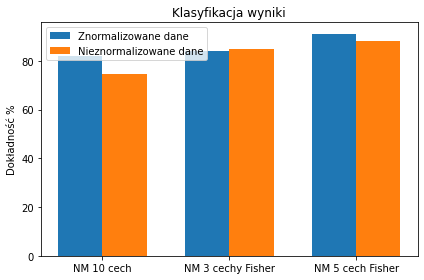

In [17]:
labels = ['NM 10 cech','NM 3 cechy Fisher','NM 5 cech Fisher']
znormalizowane = [82.18,84,91.27]
nie_znormalizowane = [74.55,85.09,88]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, znormalizowane, width, label='Znormalizowane dane')
rects2 = ax.bar(x + width/2, nie_znormalizowane, width, label='Nieznormalizowane dane')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dokładność %')
ax.set_title('Klasyfikacja wyniki')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

NM 10 cech:
- 82.18% po normalizacji
- 74.55% przed normalizacją

NM 3 cechy Fisher:
- 84% po normalizacji
- 85.09% przed normalizacją

NM 5 cech Fisher:
- 91.27% po normalizacji
- 88% przed normalizacją

Jak można zauważyć, nie zawsze wybrane losowo cechy będą lepsze od dobrze wybranych (za pomocą Fishera). Wykorzystanie zaledwie 3 cech, lecz dobrych (zamiast 10) pozwoliło na zwiększenie skuteczności algorytmu NM o 2% po oraz ok. 10% przed normalizacją.

Im więcej dobrze dobranych cech, tj. 5 cech Fisher, tym osiągamy najwyższy w tym ćwiczeniu procent klasyfikacji, tj. 91.27% po oraz 88% przed normalizacją danych.

Dobrze dobrane cechy pozwoliły nieznormalizowanym danym na dużo bardziej zbliżone wyniki do znormalizowanych.